## Real Estate Project

### Importing Libraries

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

### Loading Dataset

In [35]:
data = pd.read_csv("Downloads/Real Estate.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### Checking For Null Values

In [36]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### Treating Null Values

In [37]:
np.mean(data["total_bedrooms"])
data["total_bedrooms"].median()

435.0

In [63]:
data["total_bedrooms"].fillna(data["total_bedrooms"].median(),inplace=True)

In [64]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


### Visualizing The Data

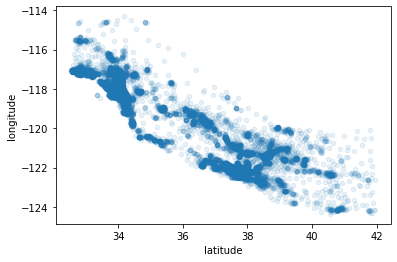

In [65]:
data.plot(x='latitude',y='longitude',kind='scatter',alpha=0.1)

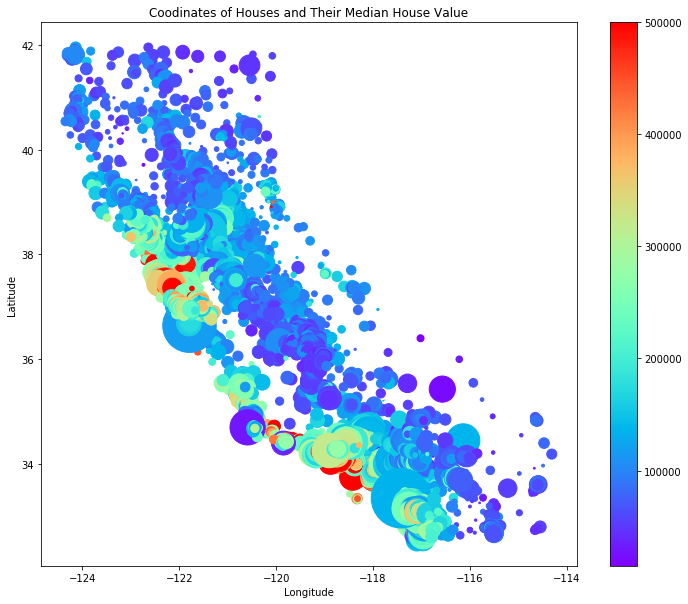

In [71]:
plt.figure(figsize=(12,10))
plt.scatter(data['longitude'],data['latitude'],c=data['median_house_value'],s=data['population']/10, cmap='rainbow')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coodinates of Houses and Their Median House Value')
plt.show()

In [41]:
le = LabelEncoder()
data['ocean_proximity'] = le.fit_transform(data['ocean_proximity'])

In [42]:
data.ocean_proximity.value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

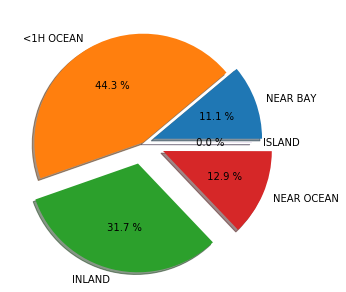

In [43]:
house=['NEAR BAY','<1H OCEAN','INLAND','NEAR OCEAN','ISLAND']
house_count=[2290,9136,6551,2658,5]
fig = plt.figure(figsize =(5,5))
explode = (0.1, 0.0, 0.2, 0.2, 0.0)
plt.pie(house_count, labels = house,autopct ='% 1.1f %%',shadow=True,explode=explode)  
plt.show() 

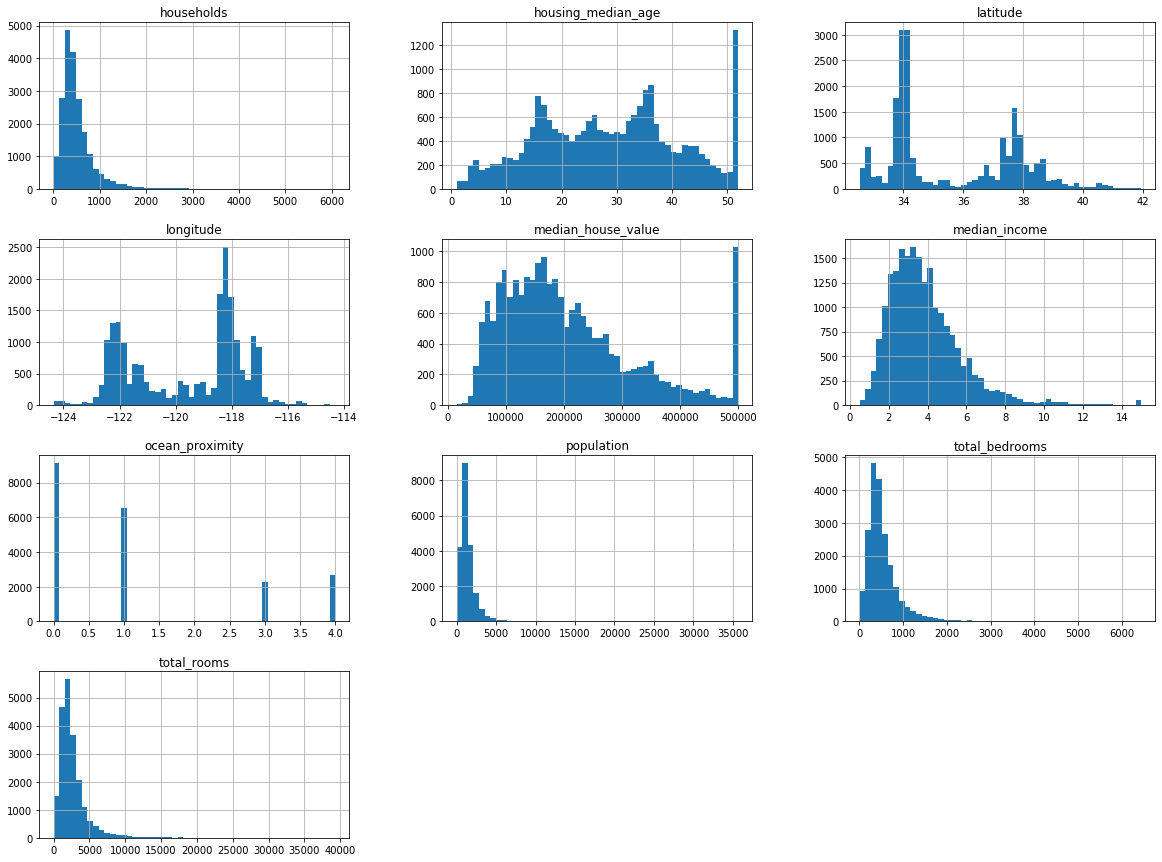

In [44]:
data.hist(bins=50, figsize=(20,15))
plt.show();

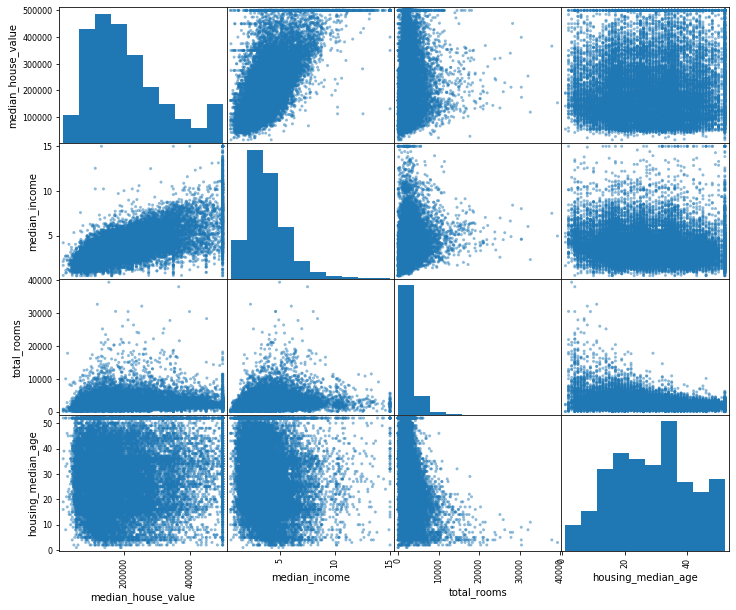

In [95]:
attr = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(data[attr], figsize=(12, 10))
plt.show()

### Detecting Outliers

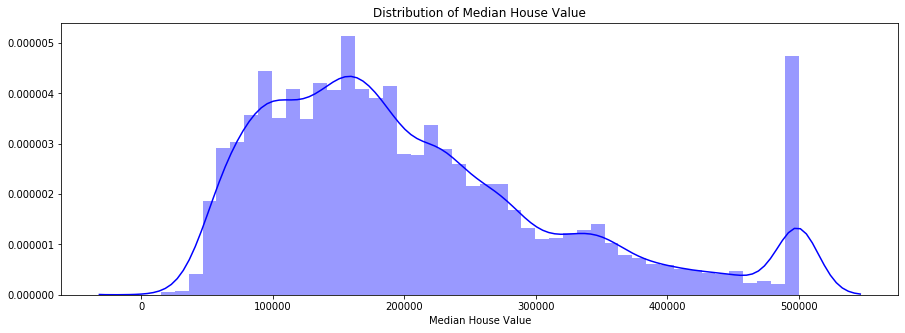

In [72]:
plt.figure(figsize=(15,5))
sns.distplot(data['median_house_value'],color='blue')
plt.xlabel('Median House Value')
plt.title('Distribution of Median House Value')
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

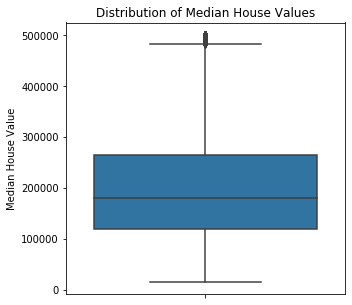

In [73]:
plt.figure(figsize=(5,5))
sns.boxplot(y='median_house_value',data=data)
plt.ylabel('Median House Value')
plt.title('Distribution of Median House Values')
plt.plot

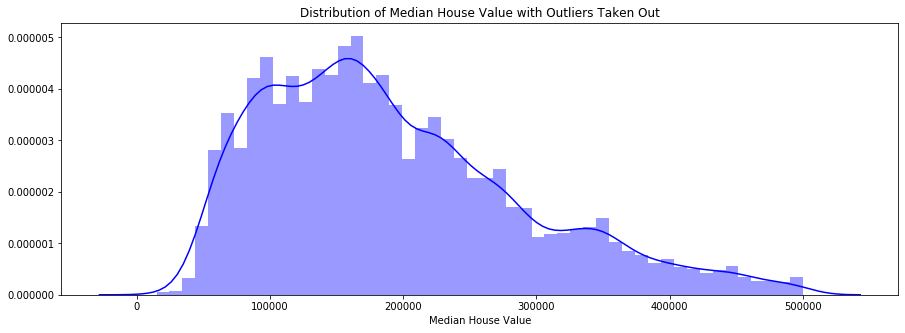

In [74]:
data[data['median_house_value']>450000]['median_house_value'].value_counts().head()
data_outlier=data.loc[data['median_house_value']<500001,:]
plt.figure(figsize=(15,5))
sns.distplot(data_outlier['median_house_value'], color = 'blue')
plt.xlabel('Median House Value')
plt.title('Distribution of Median House Value with Outliers Taken Out')
plt.show()

In [79]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.912196,0.213284,0.931571,0.974361,0.955723,0.936548,0.724239,NaN,NaN
latitude,-0.912196,1.000000,-0.518722,-0.990762,-0.974435,-0.992259,-0.997121,-0.930528,NaN,NaN
housing_median_age,0.213284,-0.518722,1.000000,0.403583,0.325337,0.428724,0.453903,0.558504,NaN,NaN
total_rooms,0.931571,-0.990762,0.403583,1.000000,0.989378,0.993041,0.996794,0.925272,NaN,NaN
total_bedrooms,0.974361,-0.974435,0.325337,0.989378,1.000000,0.993765,0.988502,0.860328,NaN,NaN
population,0.955723,-0.992259,0.428724,0.993041,0.993765,1.000000,0.998035,0.888520,NaN,NaN
households,0.936548,-0.997121,0.453903,0.996794,0.988502,0.998035,1.000000,0.915509,NaN,NaN
median_income,0.724239,-0.930528,0.558504,0.925272,0.860328,0.888520,0.915509,1.000000,NaN,NaN
ocean_proximity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_house_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


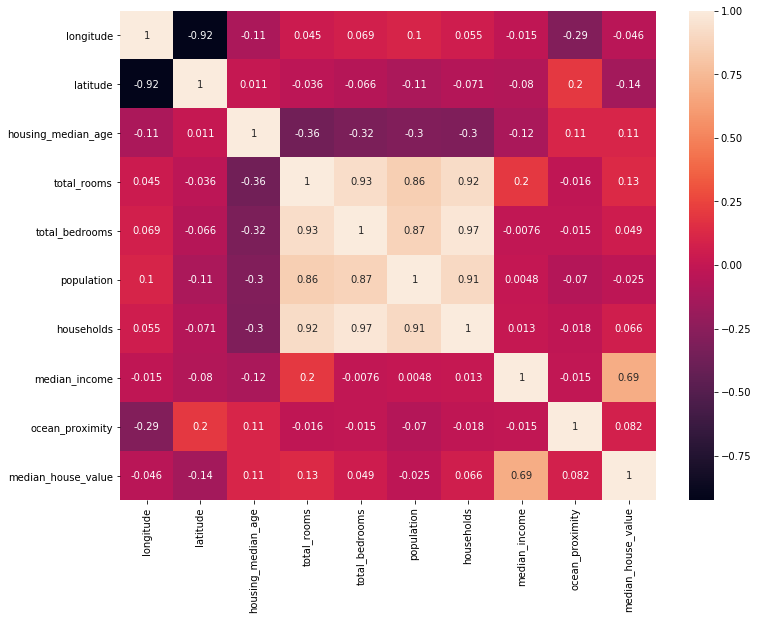

In [82]:
fig = plt.figure(figsize = (12,9))
sns.heatmap(data.corr(),annot=True)

### Data Preprocessing

In [83]:
le = LabelEncoder()
data['ocean_proximity'] = le.fit_transform(data['ocean_proximity'])

In [50]:
y = data.median_house_value
x = data.drop(columns="median_house_value")
x.shape, y.shape

((20640, 9), (20640,))

### Splitting Data For Tranning And Testing

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Tranning And Predicting The Data

#### By Random Forest

In [130]:
rf=RandomForestRegressor(random_state=2,n_estimators=24)

In [131]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=24, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [135]:
y_pred = rf.predict(x_test)

In [136]:
r2_score(y_test,y_pred)

0.8229289465912908